## Search algorithms

We can generally classify AI in two paradigms:
- **Solvers**: given a specification of a problem, *search* for a solution.
- **Learners**: given a set of examples, *search* for a hypothesis (model) that best describes the examples or underlying problem.

This first week is about solvers, where we use search algorithms:
- Depth-first search
- Breadth-first search

First, we look at relevant data structures. 

### First In First Out (FIFO)

Think about a queue data structure

In [1]:
class FIFO:
    def __init__(self):
        self._data = []
    def push(self, val):
        self._data.append(val)
    def get(self, idx):
        return self._data[idx]
    def __len__(self):
        return len(self._data)
    def pop(self):
        return self._data.pop(0) if len(self._data) > 0 else None

In [3]:
d = FIFO()
d.push(4)
d.push(5)

d.pop()
a = d.pop()

# test
assert a == 5 and len(d) == 0

### Last In First Out (LIFO)

Think about a stack data structure

In [4]:
class LIFO:
    def __init__(self):
        self._data = []
    def push(self, val):
        self._data.append(val)
    def get(self, idx):
        return self._data[idx]
    def __len__(self):
        return len(self._data)
    def pop(self):
        return self._data.pop(-1) if len(self._data) > 0 else None

In [6]:
d = LIFO()
d.push(4)
d.push(5)

d.pop()
a = d.pop()

# test
assert a == 4 and len(d) == 0

The stack is interesting because:
- the 'magic' behind recursion relies on the (ab)use of the internal stack (LIFO) in the RAM of your computer.
- the stack allows us to implement **backtracking**.

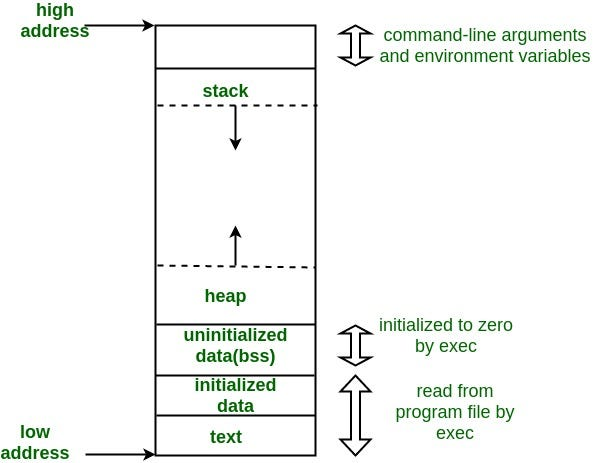

Example: traversing a binairy tree structure.

Usually implemented in a recursive manner.

In [6]:
class BinNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

tree = BinNode(1, 
            BinNode(2, 
                BinNode(4), 
                BinNode(5)
            ), 
            BinNode(3, 
                BinNode(6, 
                    BinNode(7), 
                    BinNode(8)
                )
            )
        )

# recursive definition of binary tree traversal
def print_binary_tree(root: BinNode, indent: int):
    for _ in range(indent): print(' ', end='')
    print(f'value {root.val}')
    if root.left: print_binary_tree(root.left, indent+4)
    if root.right: print_binary_tree(root.right, indent+4)
    
# non-recursive definition using a stack structure
def print_binary_tree_with_stack(root: BinNode):
    
    stack = LIFO()
    stack.push((root, 0))

    while len(stack) != 0:
        node, indent = stack.pop()
        for _ in range(indent): print(' ', end='')
        print(f'value {node.val}')
    
        if node.right: stack.push((node.right, indent+4))
        if node.left:  stack.push((node.left, indent+4))
            
print_binary_tree(tree, 0)
print()
print_binary_tree_with_stack(tree)


value 1
    value 2
        value 4
        value 5
    value 3
        value 6
            value 7
            value 8

value 1
    value 2
        value 4
        value 5
    value 3
        value 6
            value 7
            value 8


### Priority Queue

This structure assigns priorities to the values in the queue and sorts these values based on the priorities.

Priorities are determined based on some arbitrary function, $f(x)$, that we specify. Some possible priority functions are:
- $f(x)$ as a **cost** function
- $f(x)$ as a **utility** function

Example: trivial implementation (not optimal!):

In [7]:
from functools import cmp_to_key

class PriorityQueue:
    def __init__(self, f):
        self._data = []
        self.f = f
    def push(self, val):
        self._data.append(val)
        self._data = sorted(self._data, key=cmp_to_key(self.f), reverse=True)
    def __len__(self):
        return len(self._data)
    def get(self, idx):
        return self._data[idx]
    def pop(self):
        return self._data.pop(0) if len(self._data) > 0 else None

# init queue with priority function f(a, b) = b - a
# i.e., a < b for all a, b in queue
queue = PriorityQueue(lambda a, b: b - a) 

queue.push(4)
queue.push(5)
queue.push(2)
queue.push(7)

assert queue._data == [2, 4, 5, 7]

queue.push(1)

assert queue._data == [1, 2, 4, 5, 7]

### Graph search

Let's say, we want to traverse a graph and print each node's value 

In [8]:
from collections import defaultdict
 
# This class represents an undirected graph
class Graph:
 
    def __init__(self):
        self.graph = defaultdict(list)      # init dictionary of empty lists
 
    # Function to add an undirected edge to graph
    def add_edge(self, u: int, v: int):
        self.graph[u].append(v)             # v is child of u
        self.graph[v].append(u)             # u is child of v
    
    def traversal(self, initial_node: int, algorithm='bfs'):
        
        frontier = None
        if algorithm == 'bfs':              # use FIFO stack in BSF
            frontier = FIFO()
        elif algorithm == 'dfs':            # use LIFO queue in DSF
            frontier = LIFO()
        
        frontier.push(initial_node)         # push initial node into frontier
        reached = [initial_node]            # initial node is already reached

        while len(frontier) != 0:           # continue until the queue is empty
            
            node = frontier.pop()           # get first node in queue
            print(node, end=' ')            # print this node

            for child in self.graph[node]:  # iterate through children of node
                if child not in reached:    # if child is not yet visited
                    reached.append(child)   # it is now visited
                    frontier.push(child)    # push child into FIFO queue 

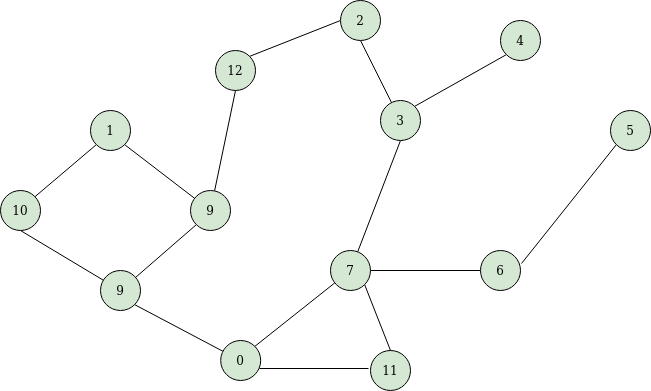

In [9]:
g = Graph()
g.add_edge(2, 3);  g.add_edge(3, 4);  g.add_edge(3, 7);  g.add_edge(7, 6)
g.add_edge(6, 5);  g.add_edge(7, 11); g.add_edge(7, 0);  g.add_edge(0, 9)
g.add_edge(0, 11); g.add_edge(9, 9);  g.add_edge(9, 10); g.add_edge(10, 1)
g.add_edge(1, 9);  g.add_edge(9, 12); g.add_edge(12, 2)

In [16]:
' '.join(map(str, [0, 7, 9, 11, 3, 6, 10, 1, 12, 2, 4, 5]))

'0 7 9 11 3 6 10 1 12 2 4 5'

In [20]:
print('Implementation')
g.traversal(0, algorithm='bfs')

print('\nActual traversal')
print(' '.join(map(str, [0, 7, 9, 11, 3, 6, 10, 1, 12, 2, 4, 5])))

Implementation
0 7 9 11 3 6 10 1 12 2 4 5 
Actual traversal
0 7 9 11 3 6 10 1 12 2 4 5


In [22]:
print('Implementation')
g.traversal(0, algorithm='dfs')

print('\nActual traversal')
print(' '.join(map(str, [0, 7, 9, 11, 3, 6, 10, 1, 12, 2, 4, 5])))

Implementation
0 11 9 12 2 3 4 1 10 7 6 5 
Actual traversal
0 7 9 11 3 6 10 1 12 2 4 5


Note: depth-first is usually applied in directed graphs and trees, which makes the order in undirected graphs less intuitive. 

### Uniform-cost search (Dijkstra) 

In the algorithm of Dijkstra, we use an adjacency matrix representation of a graph. 

Given an undirected graph

```
a --\
|    c -- d
b --/
```
Its adjacency matrix is then:

| |a|b|c|d|
|-|-|-|-|-|
|**a**|0|1|1|0|
|**b**|1|0|1|0|
|**c**|1|1|0|1|
|**d**|0|0|1|0|

Notice that:
- the matrix is symmetric over the diagonal
- the 1's represent weights between nodes
- gives us a way to inject information for each edge in the graph

In [1]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class AdjacencyGraph:

	def __init__(self, graph: list[list[int]]):
		self.V = len(graph)
		self.graph = graph
		self.dist = None

	def print_solution(self):
		print("Node \t Distance from Source")
		for node in range(self.V):
			print(node, "\t\t", self.dist[node])

	# A utility function to find the node with
	# minimum distance value, from the set of nodes
	# not yet included in shortest path tree
	def min_distance(self, sptSet):

		# Initialize minimum distance as infinite
		min = float("inf")

		# Search through nodes not in the shortest path tree
		# that are less than min
		for v in range(self.V):
			if self.dist[v] < min and sptSet[v] == False:
				min = self.dist[v]
				min_index = v

		return min_index

	def dijkstra(self, src):

		self.dist = [1e7] * self.V
		self.dist[src] = 0
		sptSet = [False] * self.V	# shortest path tree set

		for _ in range(self.V):

			# Pick the minimum distance node from
			# the set of nodes not yet processed.
			# u is always equal to src in first iteration
			u = self.min_distance(sptSet)

			# Put the minimum distance node in the
			# shortest path tree
			sptSet[u] = True

			# Update dist value of the adjacent vertices
			# of the picked node only if the current
			# distance is greater than new distance and
			# the node is not in the shortest path tree
			for v in range(self.V):
				if (self.graph[u][v] > 0 and sptSet[v] == False and \
					self.dist[v] > self.dist[u] + self.graph[u][v]):

					self.dist[v] = self.dist[u] + self.graph[u][v]

		self.print_solution()

# This code is contributed by Divyanshu Mehta

In [2]:
graph = [
	[0, 4, 0, 0, 0, 0, 0, 8, 0],
	[4, 0, 8, 0, 0, 0, 0, 11, 0],
	[0, 8, 0, 7, 0, 4, 0, 0, 2],
	[0, 0, 7, 0, 9, 14, 0, 0, 0],
	[0, 0, 0, 9, 0, 10, 0, 0, 0],
	[0, 0, 4, 14, 10, 0, 2, 0, 0],
	[0, 0, 0, 0, 0, 2, 0, 1, 6],
	[8, 11, 0, 0, 0, 0, 1, 0, 7],
	[0, 0, 2, 0, 0, 0, 6, 7, 0]
]

# Example of a directed graph
# note that the adjacency matrix is not symmetric along the diagonal
graph2 = [
	[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,2,0,3,0,0,0,0,1,2,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0],
	[0,0,0,1,0,0,0,0,0,5,2,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2],
	[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]

g = AdjacencyGraph(graph2)

g.dijkstra(0)

Node 	 Distance from Source
0 		 0
1 		 1
2 		 3
3 		 9
4 		 11
5 		 7
6 		 5
7 		 4
8 		 8
9 		 13
10 		 10
11 		 5
12 		 6
13 		 6
14 		 9
15 		 10
16 		 15
17 		 7
18 		 11
19 		 13
